# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.81'

In [12]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [13]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,K23_10_FIA_50X,103.321597,0.003499,1285.529855,0.003217,1366.809244,1285.529905,2180.498743,0.585752,6.004058,...,1.164134,1.152174,0.192283,0.000857,1.100917,1.100000,0.102722,0.000419,PseudoVoigtModel,PseudoVoigtModel
1,K23_1_FIA_50X,103.356973,0.002187,1285.483474,0.001945,1293.306052,1285.483524,2058.897395,0.590886,3.925973,...,1.181009,1.146552,0.213911,0.000914,1.081081,1.081776,0.082790,0.000456,PseudoVoigtModel,PseudoVoigtModel
2,K23_1_FIA_50X_r2_longeraq,103.348095,0.001765,1285.494438,0.001549,1856.198327,1285.494488,2970.509854,0.593064,4.691197,...,1.198198,1.185185,0.235088,0.000639,1.065476,1.067130,0.067219,0.000313,PseudoVoigtModel,PseudoVoigtModel
3,K23_2_FIA_50X,103.003054,0.032420,1286.359387,0.029440,46.443630,1286.359387,46.283882,0.468985,1.839397,...,1.195035,1.201117,0.182937,0.020196,1.034483,1.038889,0.025743,0.009674,PseudoVoigtModel,PseudoVoigtModel
4,K23_2_FIB_50X,103.155017,0.003336,1285.990417,0.002897,631.307044,1285.990467,772.581801,0.482237,2.542673,...,1.252632,1.266846,0.243657,0.001528,1.095057,1.122507,0.086871,0.000889,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [14]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]

'02 K23_10_FIA_50X.txt'

## Now get all the important information out of the metadata files

In [16]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 39/39 [00:00<00:00, 129.24it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,K23_10_FIA_50X.txt,"September 20, 2023\n",September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '2s']",2:25:32 PM\n,51932.0,1325.004
1,Spectrum--009--Information.txt,"September 20, 2023\n",September,20.0,NaN,60.0,4.0,50.0,"['0h', '0m', '1s']",2:30:09 PM\n,52209.0,1325.004
2,K23_1_FIA_50X.txt,"September 20, 2023\n",September,20.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:33:31 PM\n,52411.0,1325.004
3,K23_1_FIA_50X_r2_longeraq.txt,"September 20, 2023\n",September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '2s']",2:36:33 PM\n,52593.0,1325.004
4,K23_2_FIA_50X.txt,"September 20, 2023\n",September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '2s']",2:52:03 PM\n,53523.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [17]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'K23_10_FIA_50X'

## Now get filename from spectra into same form as metadata

In [18]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
K23_10_FIA_50X


In [19]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,K23_10_FIA_50X,103.321597,0.003499,1285.529855,0.003217,1366.809244,1285.529905,2180.498743,0.585752,6.004058,...,September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '2s']",2:25:32 PM\n,51932.0,1325.004
1,K23_1_FIA_50X,103.356973,0.002187,1285.483474,0.001945,1293.306052,1285.483524,2058.897395,0.590886,3.925973,...,September,20.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:33:31 PM\n,52411.0,1325.004
2,K23_1_FIA_50X_r2_longeraq,103.348095,0.001765,1285.494438,0.001549,1856.198327,1285.494488,2970.509854,0.593064,4.691197,...,September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '2s']",2:36:33 PM\n,52593.0,1325.004
3,K23_2_FIA_50X,103.003054,0.032420,1286.359387,0.029440,46.443630,1286.359387,46.283882,0.468985,1.839397,...,September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '2s']",2:52:03 PM\n,53523.0,1325.004
4,K23_2_FIB_50X,103.155017,0.003336,1285.990417,0.002897,631.307044,1285.990467,772.581801,0.482237,2.542673,...,September,20.0,NaN,60.0,4.0,50.0,"['0h', '4m', '1s']",2:56:49 PM\n,53809.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [21]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [22]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [23]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.465495739435719e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,K23_10_FIA_50X,0.131192,0.004092,0.001387,0.003850,103.081348,0.003501,0.000262,0.003499,NaN,...,NaN,NaN,NaN,NaN,0.103741,2.4,51932.0,0.997675,0.997672,0.997677
1,K23_1_FIA_50X,0.144834,0.003981,0.000871,0.003884,103.115777,0.002197,0.000259,0.002187,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52411.0,0.997666,0.997664,0.997669
2,K23_1_FIA_50X_r2_longeraq,0.141198,0.003938,0.000705,0.003874,103.106601,0.001779,0.000258,0.001765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52593.0,0.997663,0.997661,0.997666
3,K23_2_FIA_50X,0.004187,0.000000,0.000000,0.000000,102.760822,0.032344,0.000252,0.032420,NaN,...,NaN,NaN,NaN,NaN,0.403457,8.8,53523.0,0.997648,0.997646,0.997651
4,K23_2_FIB_50X,0.064081,0.004038,0.001323,0.003815,102.911979,0.003338,0.000251,0.003336,NaN,...,NaN,NaN,NaN,NaN,0.093546,2.2,53809.0,0.997644,0.997642,0.997646


In [24]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.465495739435719e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,K23_10_FIA_50X,0.131192,0.004092,0.001387,0.003850,103.081348,0.003501,0.000262,0.003499,NaN,...,NaN,NaN,NaN,NaN,0.103741,2.4,51932.0,0.997675,0.997672,0.997677
1,K23_1_FIA_50X,0.144834,0.003981,0.000871,0.003884,103.115777,0.002197,0.000259,0.002187,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52411.0,0.997666,0.997664,0.997669
2,K23_1_FIA_50X_r2_longeraq,0.141198,0.003938,0.000705,0.003874,103.106601,0.001779,0.000258,0.001765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52593.0,0.997663,0.997661,0.997666
3,K23_2_FIA_50X,0.004187,0.000000,0.000000,0.000000,102.760822,0.032344,0.000252,0.032420,NaN,...,NaN,NaN,NaN,NaN,0.403457,8.8,53523.0,0.997648,0.997646,0.997651
4,K23_2_FIB_50X,0.064081,0.004038,0.001323,0.003815,102.911979,0.003338,0.000251,0.003336,NaN,...,NaN,NaN,NaN,NaN,0.093546,2.2,53809.0,0.997644,0.997642,0.997646


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [25]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_September 20, 2023_fitted_2024-02-04.xlsx


## This helps visualize the errors on each spectra 

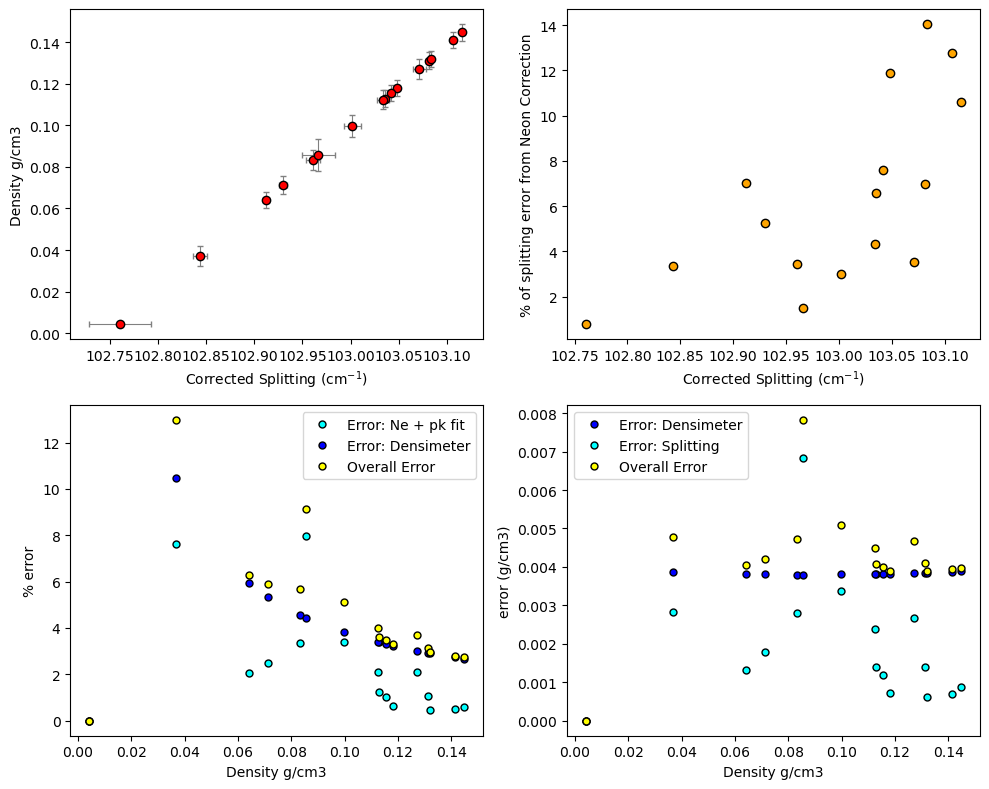

In [26]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

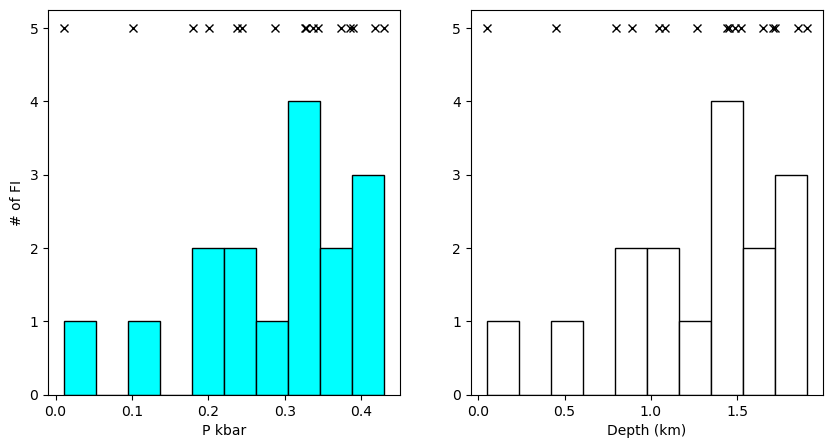

In [27]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')